# Techcareer.net: Python ile Veri Bilimi Ödev 1

In [1]:
# Pandas, numpy, matplotlib ve seaborn kütüphanelerini yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Veri seti 1: Öğrenci Notları

In [2]:
# StudentsPerformance.csv dosyasını açalım
df = pd.read_csv("StudentsPerformance.csv")

# Veri setinin ilk 20 satırını yazdıralım
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
# Veri setinin sütun isimlerini yazdıralım
print(list(df.columns))

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [4]:
# Veri setinin satır ve sütun sayısını yazdıralım
print("Satir sayisi: " + str(df.shape[0]) + "\nSutun sayisi: " + str(df.shape[1]))

Satir sayisi: 1000
Sutun sayisi: 8


In [5]:
# Giriş olarak cinsiyet değerini alan, çıkış olarak o cinsiyet grubuna ait veriyi veren bir fonksiyon yazın.
def getByGender(gender):
    return df[df["gender"] == gender]

getByGender("female")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
# Her bir ebeveyn eğitim seviyesine karşılık kaç öğrenci olduğunu gösteren bir fonksiyon yazın.
def countByParentEducation():
    return df["parental level of education"].value_counts(sort=True)

countByParentEducation()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [7]:
# Test ön hazırlık dersini alıp almama durumuna göre sınav sonuçlarının ortalama, min, ve max değerlerini hesaplayın.
def getStatsByPrep():
    return df.groupby("test preparation course")[["math score", "reading score", "writing score"]].agg([np.mean,min,max])

getStatsByPrep()

math score          reading score           \
                              mean min  max          mean min  max   
test preparation course                                              
completed                69.695531  23  100     73.893855  37  100   
none                     64.077882   0  100     66.534268  17  100   

                        writing score           
                                 mean min  max  
test preparation course                         
completed                   74.418994  36  100  
none                        64.504673  10  100

In [47]:
# Aşağıdaki tabloyu oluşturan kodu yazın.

min                                max       \
               math score      reading score      math score        
gender             female male        female male     female male   
race/ethnicity                                                      
group A                34   28            43   23         92  100   
group B                 8   30            24   24         97   94   
group C                 0   27            17   28         96   98   
group D                26   39            31   34         98  100   
group E                32   30            34   26        100  100   

                                        mean                           \
               reading score      math score            reading score   
gender                female male     female       male        female   
race/ethnicity                                                          
group A                  100   96  58.527778  63.735849     69.000000   
group B                   97   96  61.403846  65.930233     71.076923   
group C                  100  100  62.033333  67.611511     71.944444   
group D                  100   97  65.248062  69.413534     74.046512   
group E                  100  100  70.811594  76.746479     75.840580   

                           
                           
gender               male  
race/ethnicity             
group A         61.735849  
group B         62.848837  
group C         65.424460  
group D         66.135338  
group E         70.295775

In [8]:
df.pivot_table(values=["math score", "reading score"],index="race/ethnicity",columns="gender", aggfunc=[min,max,np.mean])

min                                max       \
               math score      reading score      math score        
gender             female male        female male     female male   
race/ethnicity                                                      
group A                34   28            43   23         92  100   
group B                 8   30            24   24         97   94   
group C                 0   27            17   28         96   98   
group D                26   39            31   34         98  100   
group E                32   30            34   26        100  100   

                                        mean                           \
               reading score      math score            reading score   
gender                female male     female       male        female   
race/ethnicity                                                          
group A                  100   96  58.527778  63.735849     69.000000   
group B                   97   96  61.403846  65.930233     71.076923   
group C                  100  100  62.033333  67.611511     71.944444   
group D                  100   97  65.248062  69.413534     74.046512   
group E                  100  100  70.811594  76.746479     75.840580   

                           
                           
gender               male  
race/ethnicity             
group A         61.735849  
group B         62.848837  
group C         65.424460  
group D         66.135338  
group E         70.295775

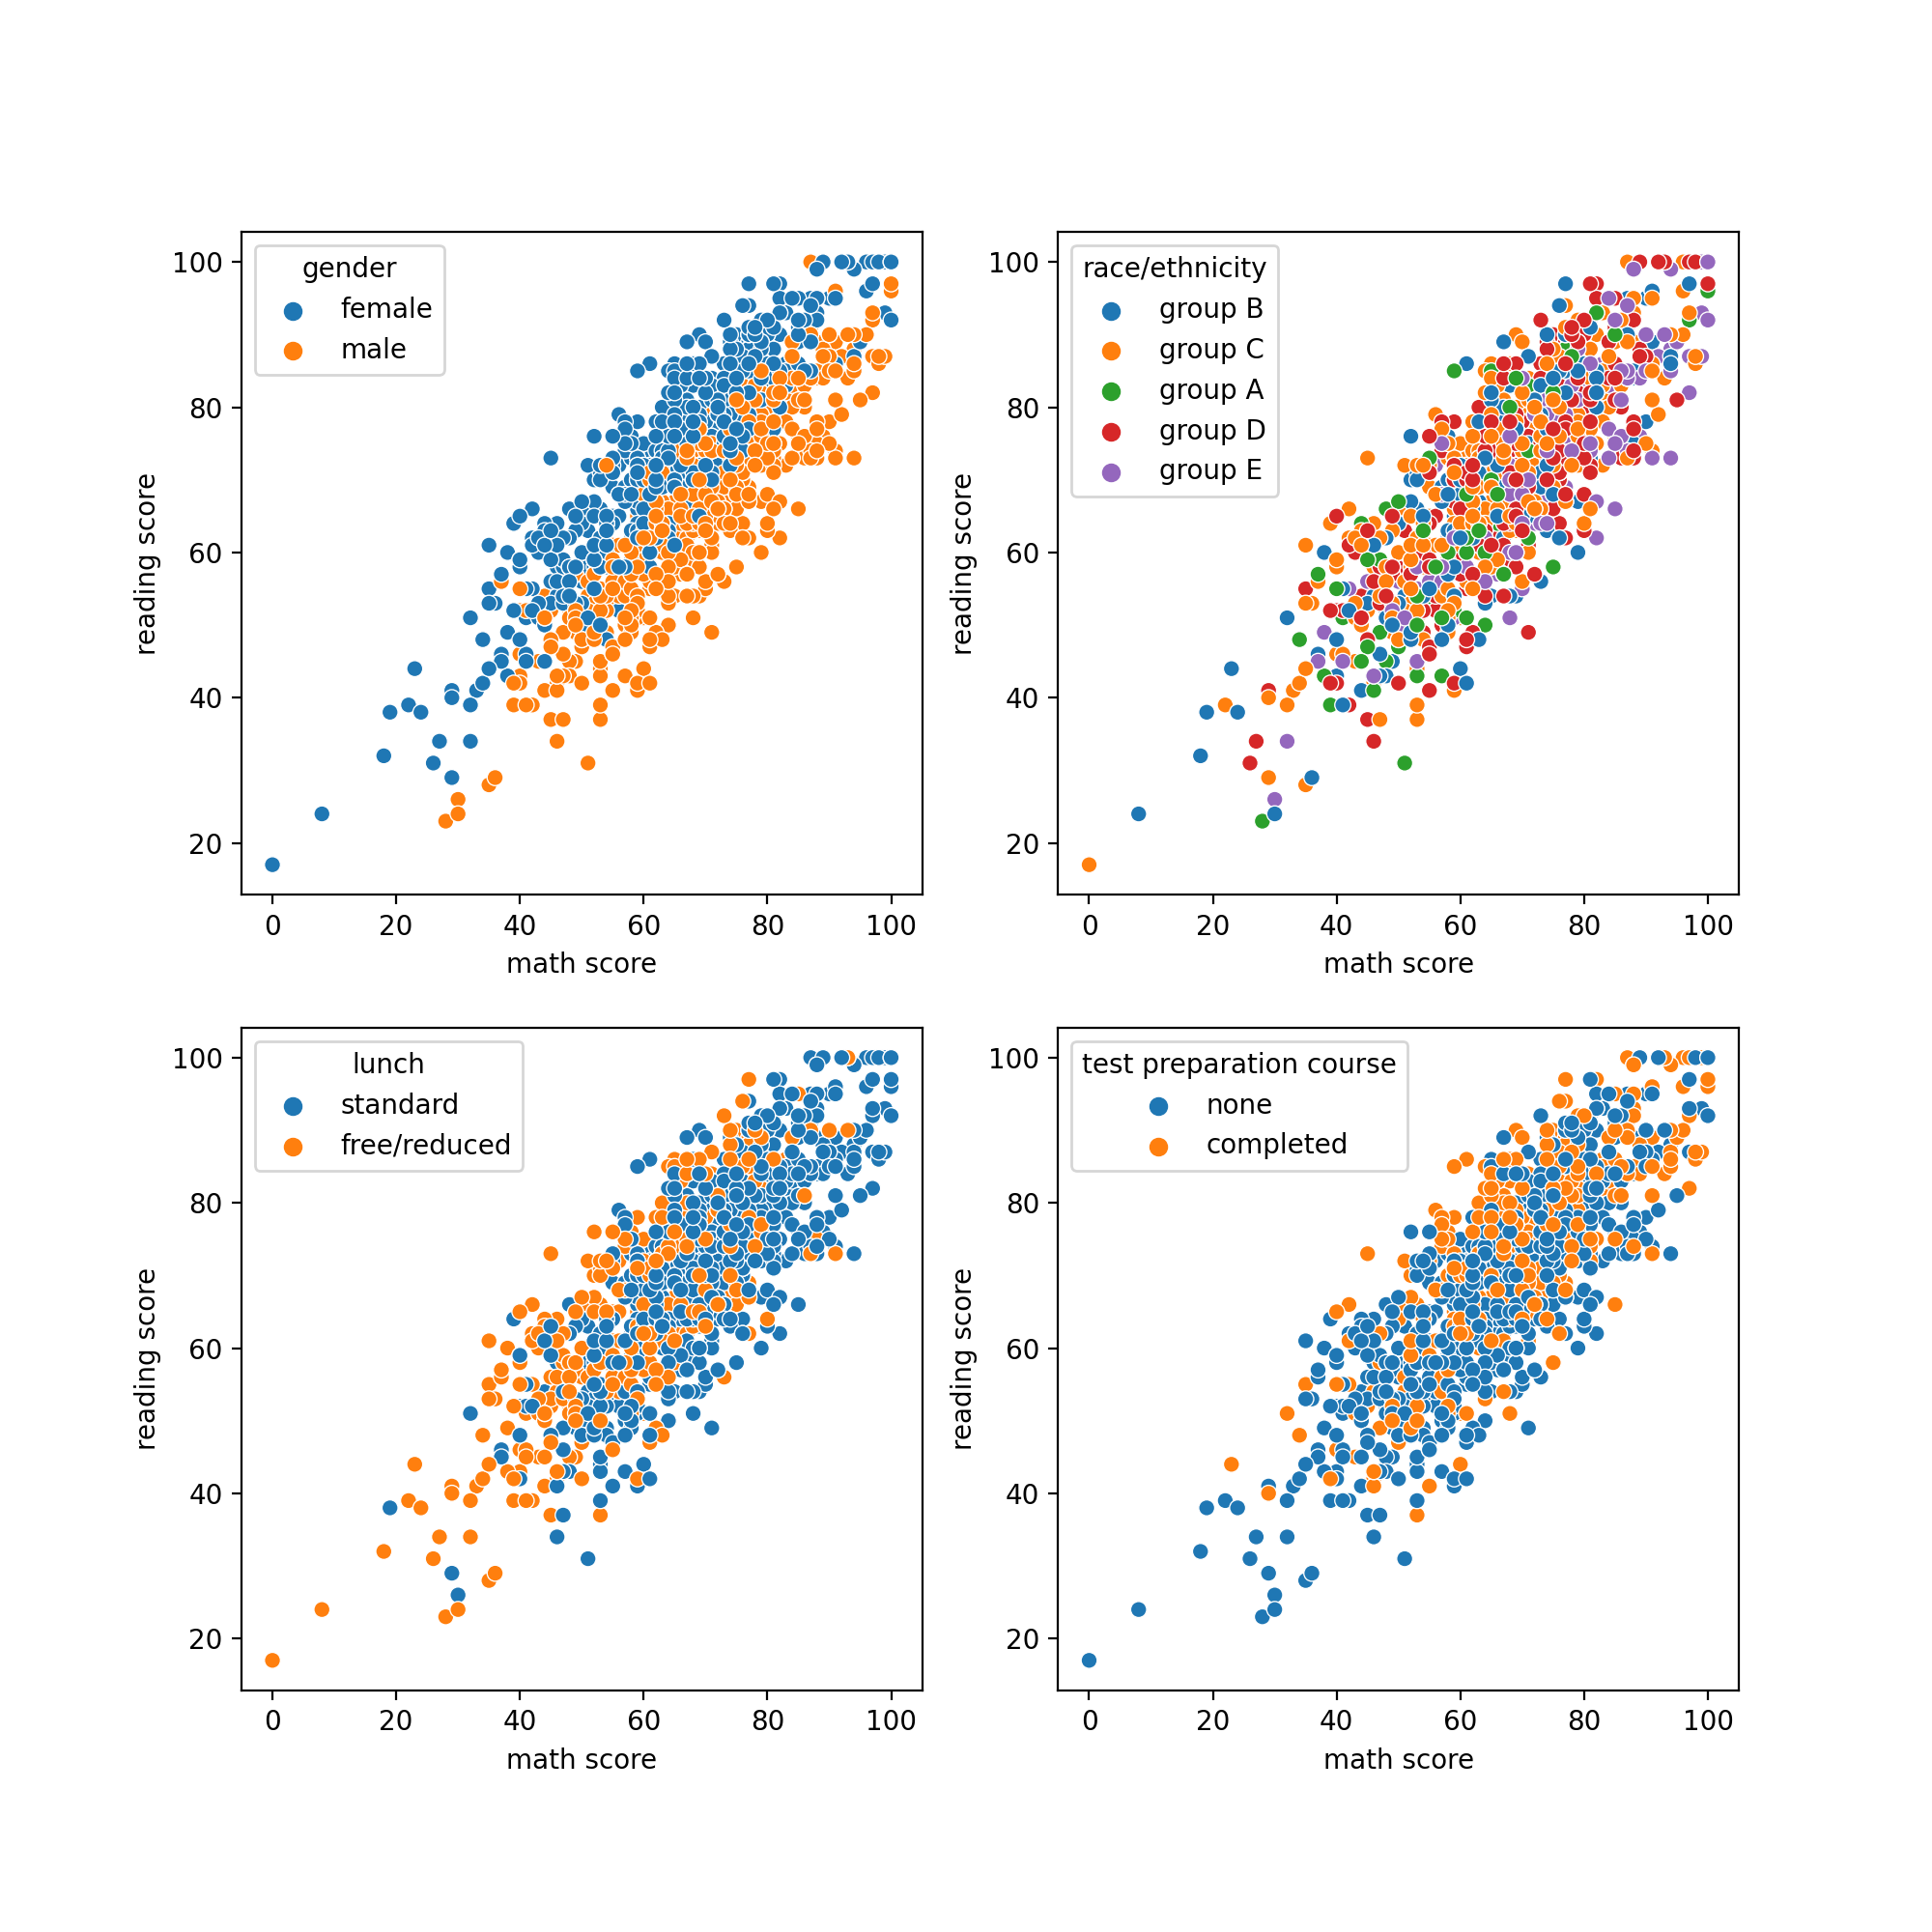

In [38]:
# Aşağıdaki resmi oluşturan kodu yazın.

<AxesSubplot:xlabel='math score', ylabel='reading score'>

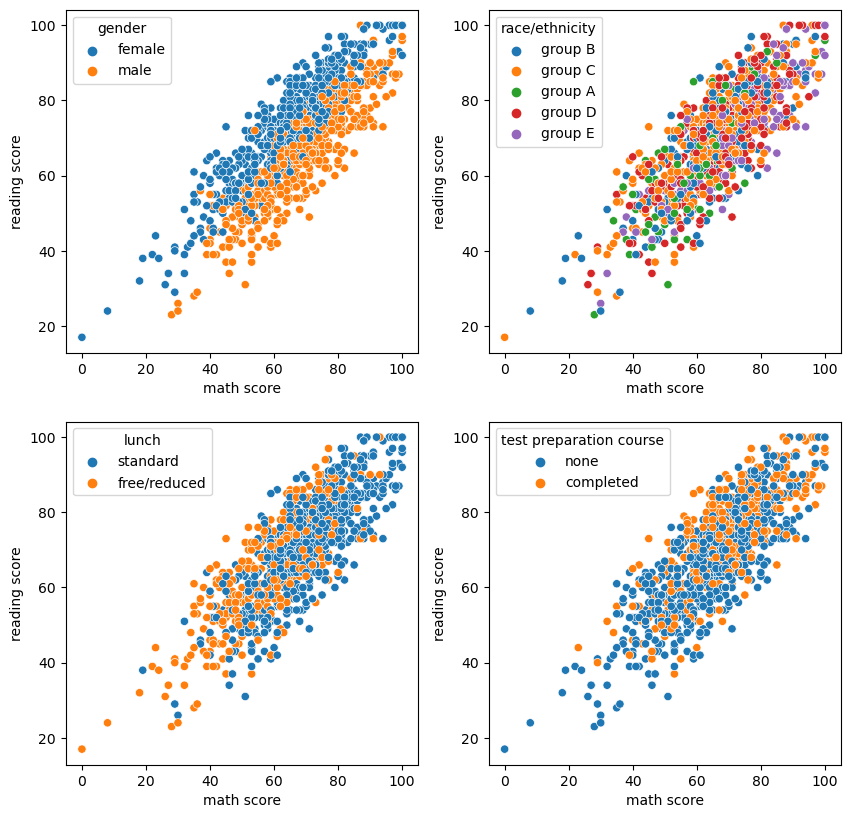

In [9]:
plt.figure(dpi=100,figsize=(10,10))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, hue='gender', x='math score', y='reading score')
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, hue='race/ethnicity', x='math score', y='reading score')
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, hue='lunch', x='math score', y='reading score')
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, hue='test preparation course', x='math score', y='reading score')

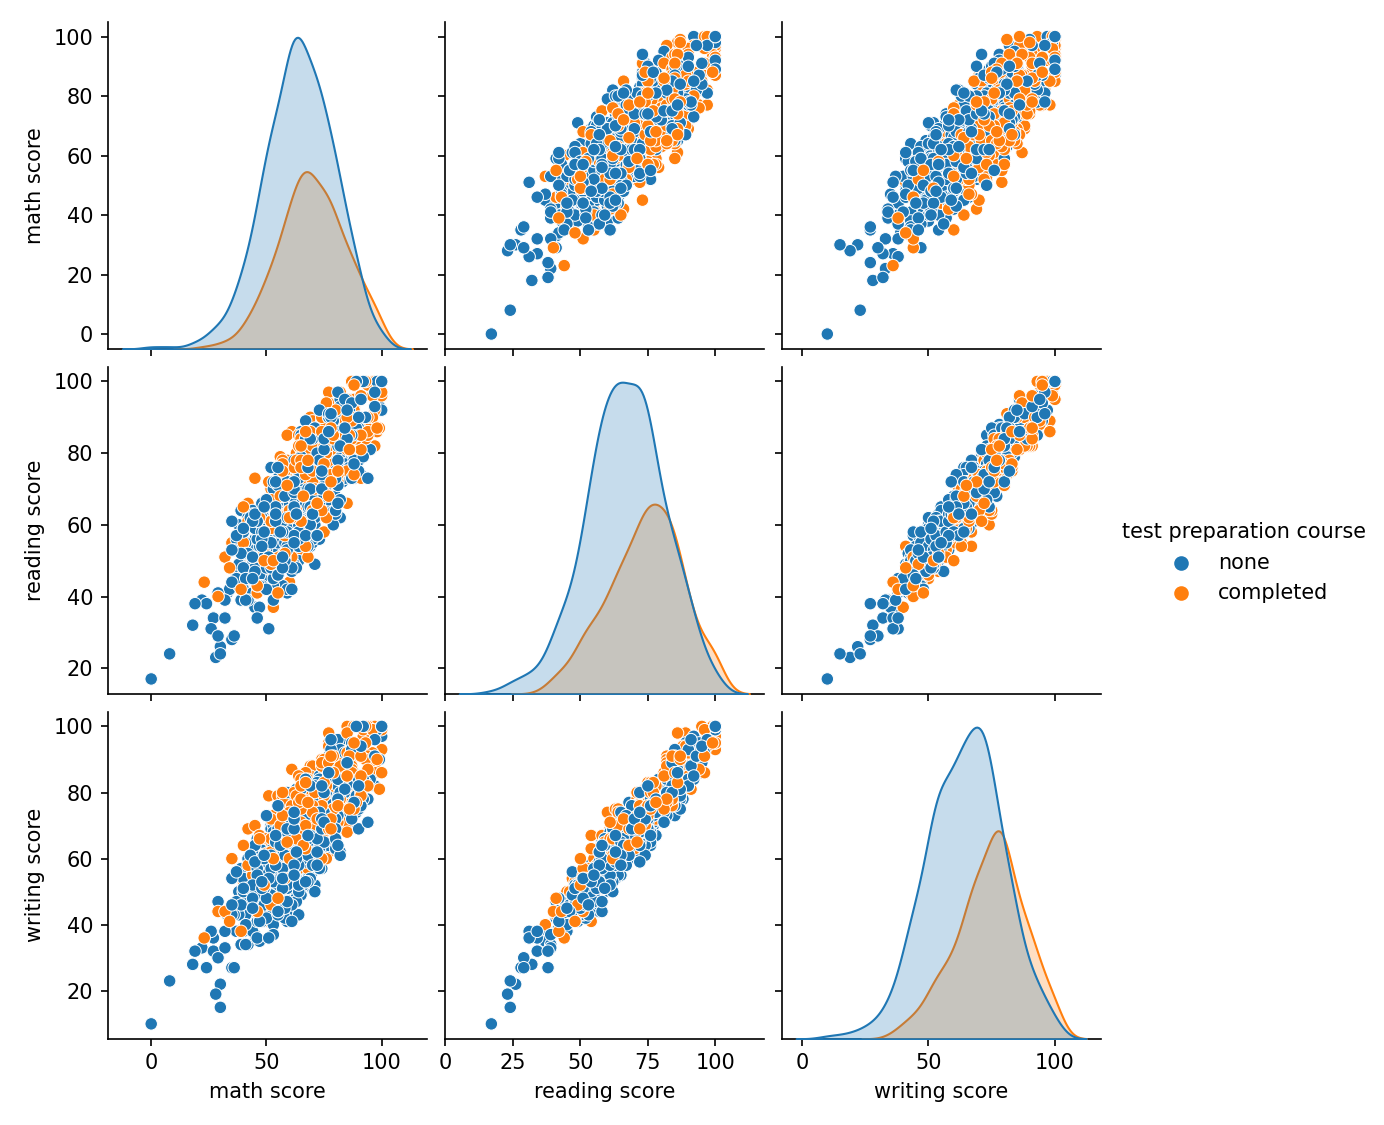

In [43]:
# Aşağıdaki resmi oluşturan kodu yazın.

<Figure size 900x600 with 0 Axes>

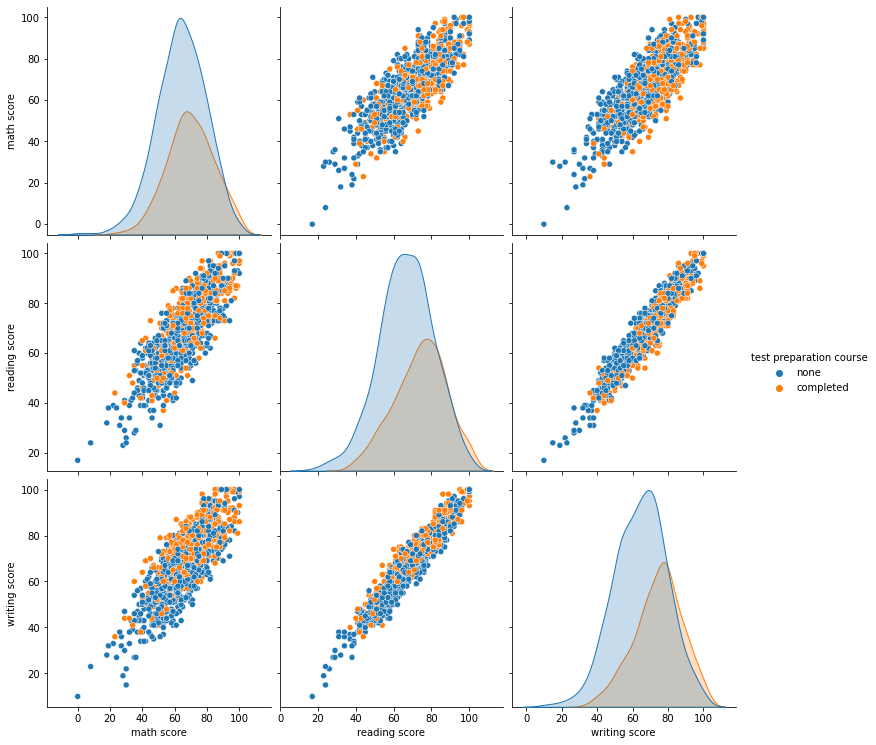

In [10]:
plt.figure(dpi=150)
sns.pairplot(df, hue="test preparation course",height=3.5);

### Veri seti 2: Netflix Veritabanı

In [11]:
# Netflix veritabanı dosyasını (netflix_titles.csv) açın
nf = pd.read_csv("netflix_titles.csv")
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
# Yalnızca dizilere ait veriyi getiren bir fonksiyon yazın.
def getShows():
    return nf[nf["type"] == "TV Show"]

getShows()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [13]:
# İçerisinde not a number bulunan sütun isimlerini yazdırın.
nan_columns = nf.columns[nf.isna().any()].tolist()
nan_columns

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

In [14]:
# Verinin içerisindeki 20 dakikadan kısa filmleri seçebilen, ve yeni bir sütunda filmlerin kısa film olup olmaıdğını belirten kodu yazın.
x = nf[nf["type"]=="Movie"]
kısa_film_mi = [False]*nf.shape[0]
for i in x["duration"].index:
    try:
        if int(x["duration"][i][:-4])<20:
            kısa_film_mi[i] = True
    except:
        pass 
nf["kisa_film"] = kısa_film_mi
nf

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,kisa_film
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",False
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",False
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",False
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,False
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",False


In [15]:
# Verilen bir sütun için not a number değerleri istenilen değerle değiştiren fonksiyon yazın. Ör: NaN ülkeleri Country diye değiştirsin.
def replaceNan(pColumn, pValue):
    nf[pColumn] = nf[pColumn].fillna(pValue)
    return nf

replaceNan("country", "Country")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,kisa_film
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",False
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",False
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",False
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,Country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",False
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,False
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",False


In [16]:
# Girdisi yönetmen ismi, çıktısı o yönetmene ait film ve diziler olan bir fonksiyon yazın. Listede olmayan yönetmen isimleri için uyarı versin.
def getByDirector(director):
    try:
        if type(nf.set_index("director").loc[director]["title"] ) is str:
            return nf.set_index("director").loc[director]["title"]
        else:
            return list(nf.set_index("director").loc[director]["title"])
    except:
        return "Director is not in the list."
        
getByDirector("David Fincher")

['The Game',
 'MANK',
 'Panic Room',
 'The Girl with the Dragon Tattoo',
 'The Social Network',
 'Zodiac']

In [17]:
# İsmi verilen bit oyuncunun hangi dizi/filmlerde rol aldığını listeleyen bir fonksiyon yazın. (ipucu: Python'un 'in' komutunu kullanabilirsiniz.)
def getByName(name):
    for i in range(nf.shape[0]):
        try:
            if (name in nf["cast"][i]) == True:
                print(nf["title"][i])
        except:
            pass

getByName("Emma Watson")

The Bling Ring
Colonia
My Week with Marilyn
The Perks of Being a Wallflower


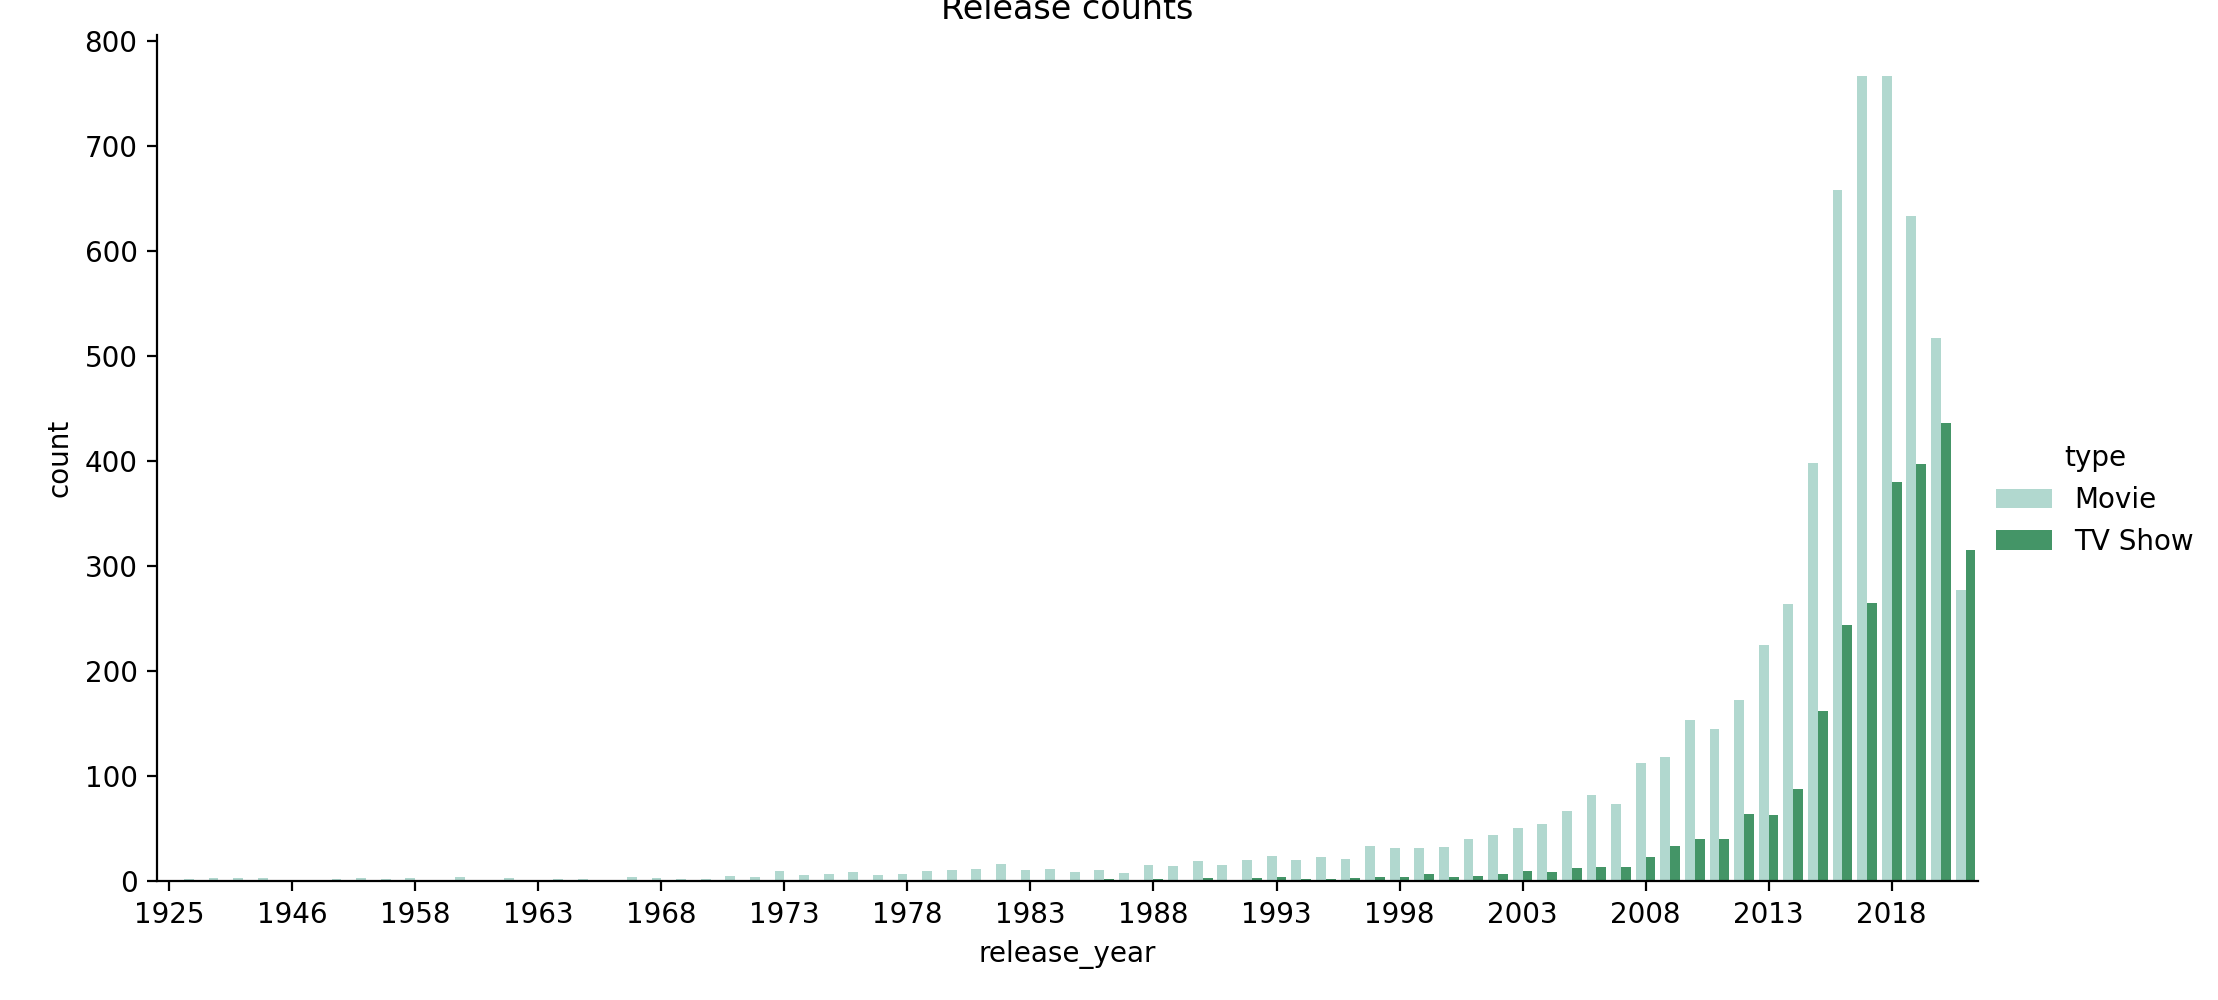

In [76]:
# Aşağıdaki resmi oluşturan kodu yazın.

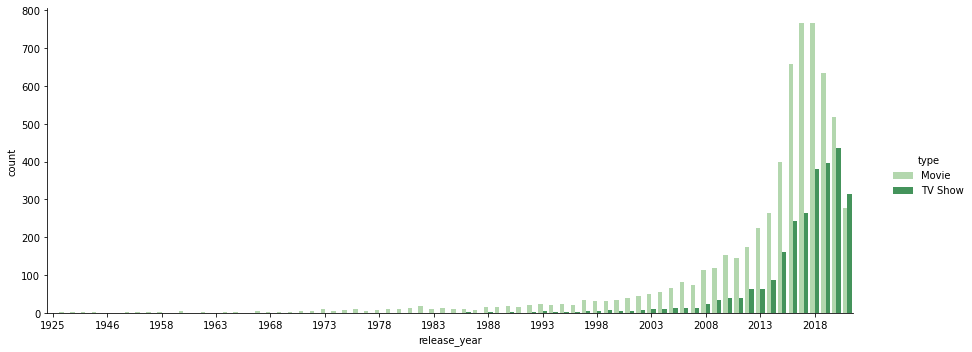

In [18]:
g = sns.catplot(x="release_year", data=nf, aspect=2.5, kind="count",  hue="type",margin_titles="Release Counts",
                palette="Greens")
g.set_xticklabels(step=5);

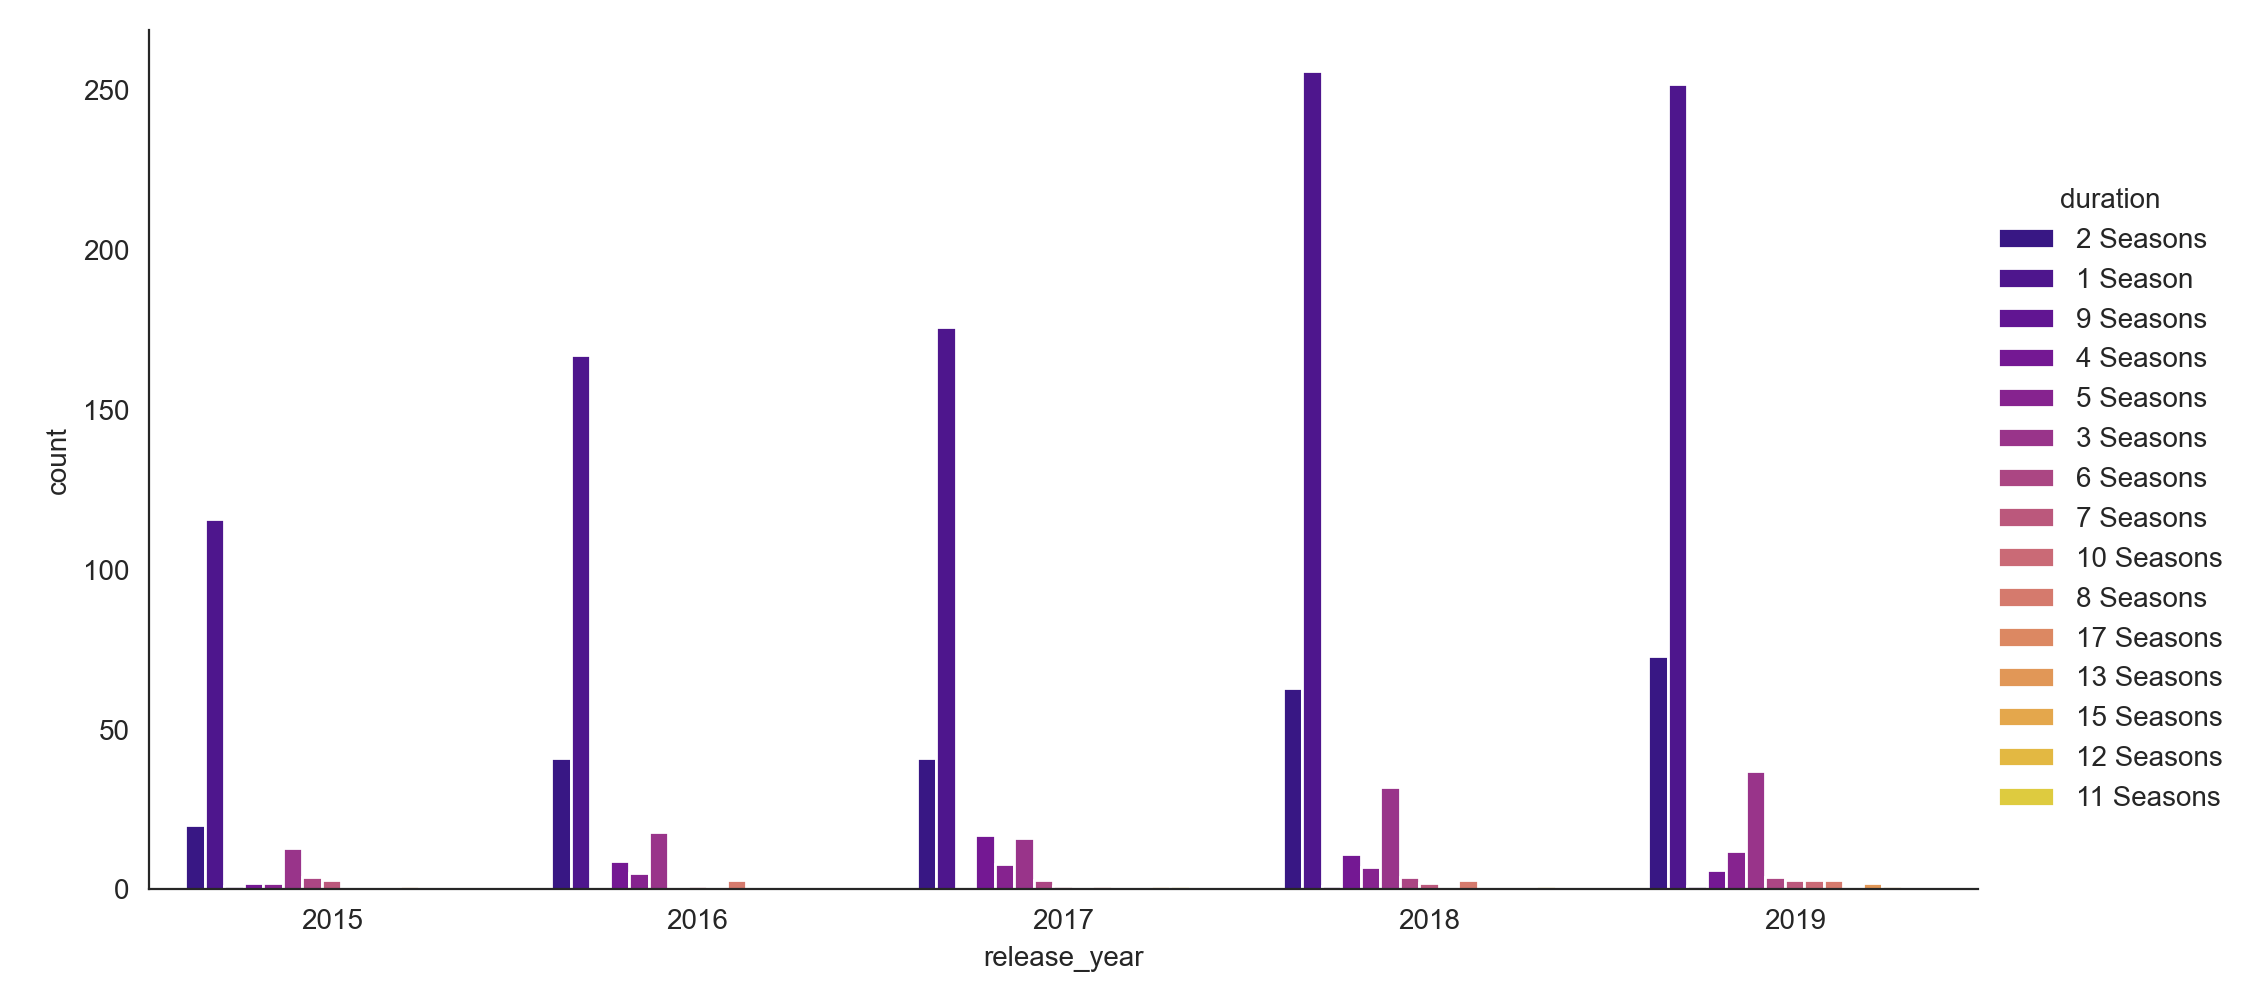

In [103]:
# Aşağıdaki resmi oluşturan kodu yazın.

<Figure size 600x400 with 0 Axes>

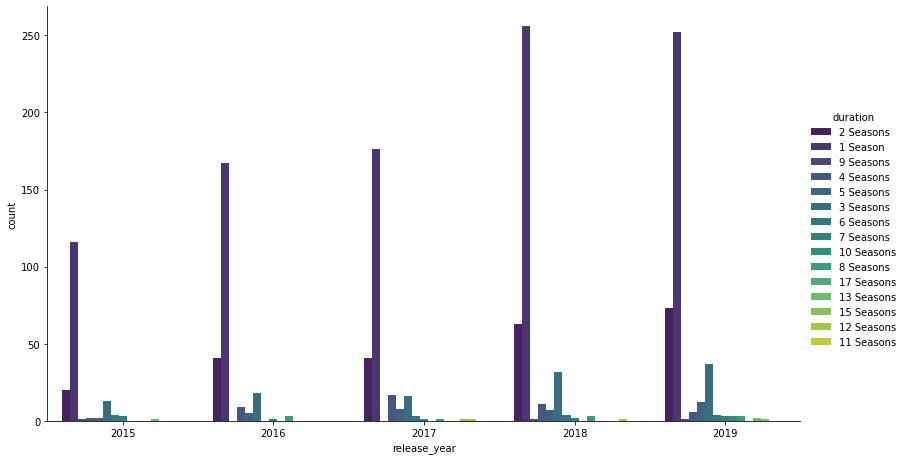

In [19]:
plt.figure(dpi=100)
sns.catplot(x="release_year", data=nf[nf["type"]=="TV Show"], aspect=1.75,height=6.5, kind="count",  hue="duration",
                    palette="viridis",order=range(2015,2020));